In [4]:
import seaborn as sns
import seaborn.objects as so

# Properties of Mark objects
##### 마크 오브젝트 속성
## Coordinate properties
##### 좌표 속성
**x, y, xmin, xmax, ymin, ymax**

x : 수평, y : 수직    
   
- 좌표속성은 플롯에서 마크가 그려지는 위치 결정     
- 일부 마크는 하나 또는 두 변수 모두에 대해 범위(최소-최대) 매개변수화 허용 👀   
- 기준선 매개변수로 범위표시도 가능 👀   
- 레이어의 오리엔트 파라미터에 따라 작동 방식 결정 👀  
- 변수가 숫자데이터가 아닐 경우 데이터를 그릴 수 있도록 해당 스케일이 변환됨 (#펭귄플롯)   
- 연속척도는 데이터 값과 공간 위치 간 비선형 변환 적용 가능 (#다이아몬드플롯)

In [5]:
penguins = sns.load_dataset("penguins")

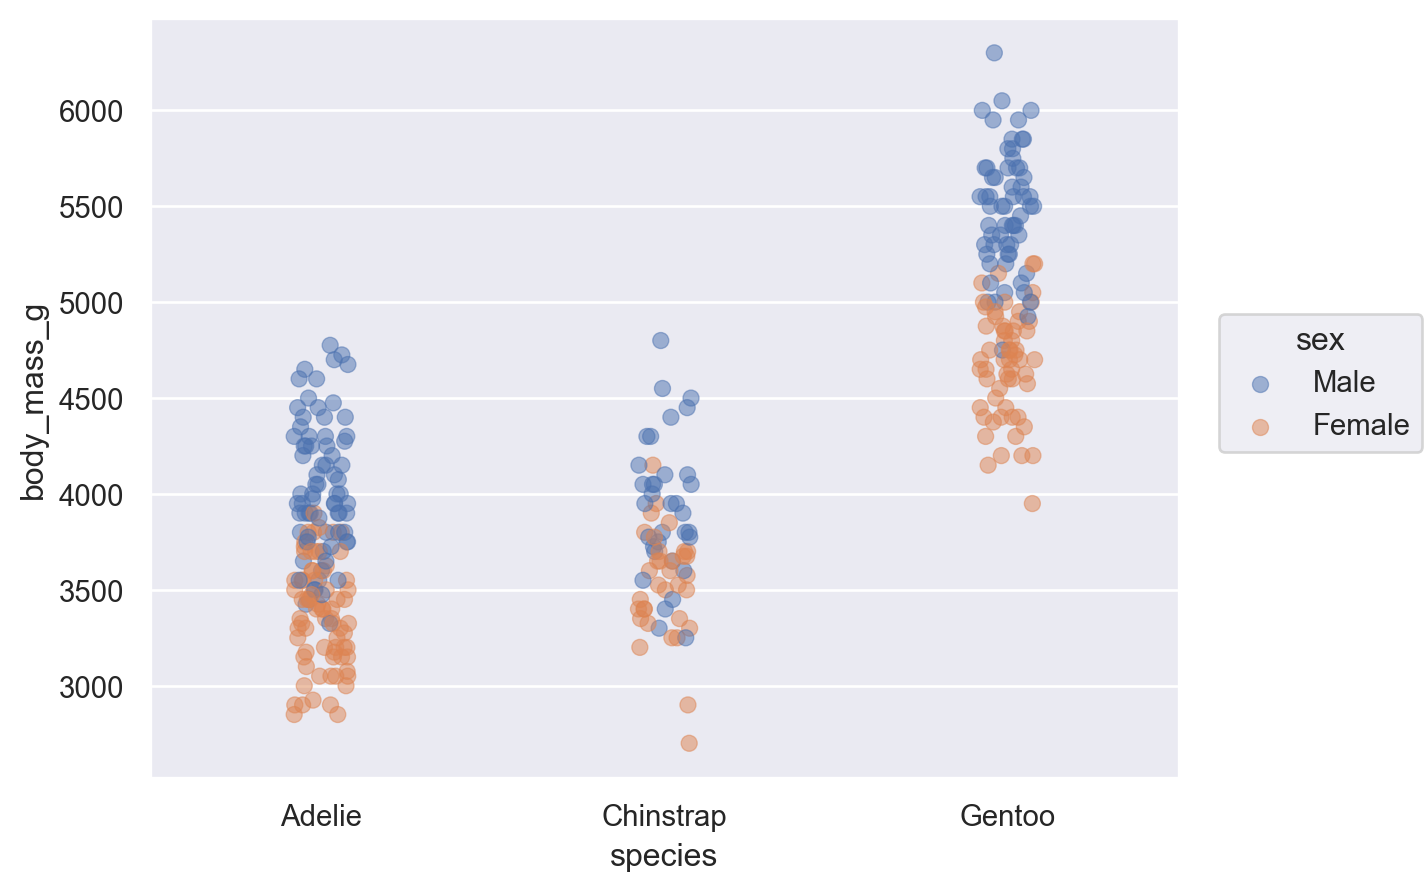

In [41]:
# x : 숫자변수 X, 명목변수. 자동으로 명목변수를 담을 수 있게 스케일 변환

(
    so.Plot(penguins, x="species", y="body_mass_g", color = 'sex')
    .add(so.Dot(alpha = 0.5), so.Jitter())
)

In [75]:
diamonds = sns.load_dataset("diamonds")

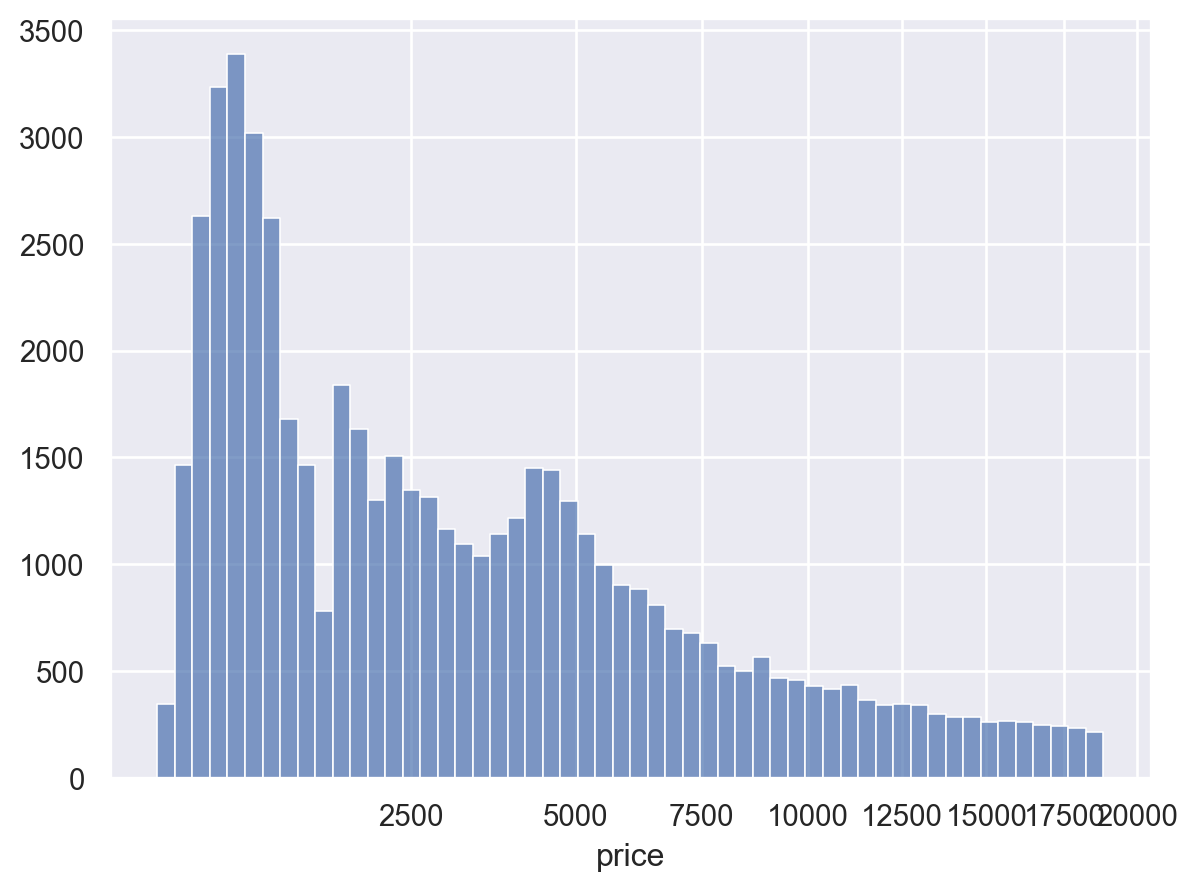

In [40]:
# scale properties : log, symlog, sqrt > 뒤로갈수록 스케일 간격이 좁은 비선형적 변환
# continuous(Numeric data)

p = so.Plot(diamonds, "price").scale(x="sqrt") 
p.add(so.Bars(), so.Hist())

## Color properties
##### 색 속성
**color, fillcolor, edgecolor**   
모든 마크에는 색상이 지정될 수 있으며 대부분 마크의 "가장자리(edge)" 색상과 "채우기(fill)" 색상을 구별합니다.   
종종 단순히 색상(color)을 사용하면 둘 다 설정되지만 보다 구체적인 속성을 사용하면 추가 제어가 가능합니다.   
색상 속성이 매핑되면 기본 색상표는 척도 유형에 따라 다릅니다.
- 명명척도: 정렬되지않은 개별색상 사용
- 연속척도(시간척도 포함): 연속 그라디언트 사용
> 기본 연속척도는 식별력을 향상시키기 위해 향후 변경될 수 있습니다.   

색상 스케일은 `viridis`, `rocket` 또는 `deep`과 같은 팔레트 이름으로 매개변수화됩니다.    
일부 팔레트 이름에는 단순 그라데이션(예: `dark:blue`) 또는 cubehelix 시스템(예: `ch:start=.2,rot=-.4`)을 비롯한 매개변수가 포함될 수 있습니다(자세한 사항은 색상 팔레트 튜토리얼 참조).


연속척도는 채워넣을 색상을 튜플로 매개변수화할 수도 있습니다.    
명명척도를 사용하는 경우 팔레트 이름(필요한 경우 개별적으로 샘플링됨), 개별 색상 값 목록 또는 데이터 값을 색상에 직접 매핑하는 딕셔너리를 만들어 적용할 수 있습니다.    
    

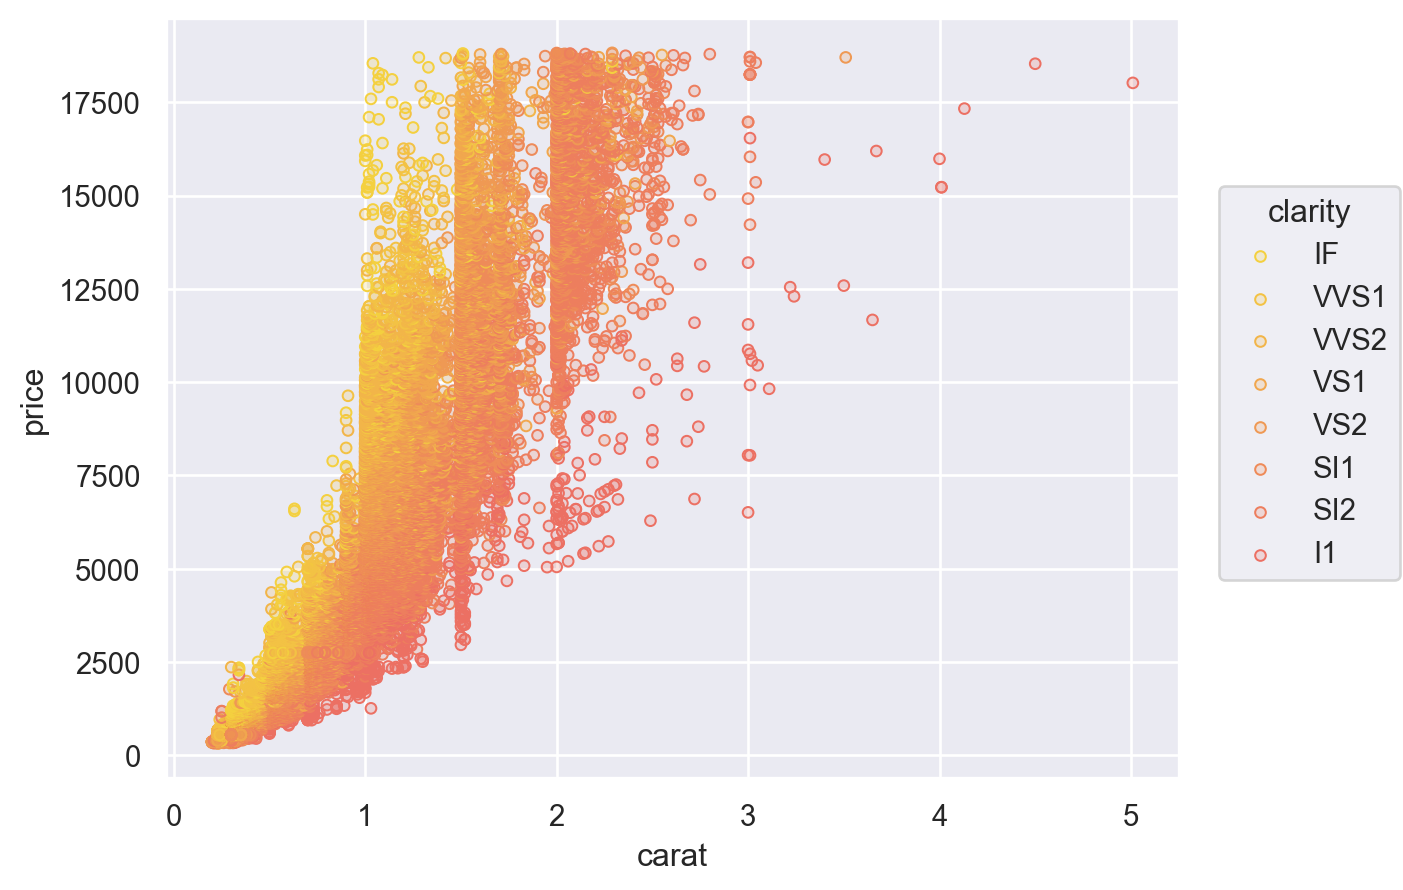

In [72]:
(
    so.Plot(diamonds, x='carat', y='price')
    .add(so.Dots(), color="clarity") # clarity? 이 위랑, 아래 scale 컬러가 뭐가 다른지 헷갈린다 👀
#     .scale(color = 'rocket') # 컬러 팔레트 적용
    .scale(color = ('#F4D03F', '#EC7063')) # 연속척도 색상 튜플 적용
)

개별 색상은 다양한 형식으로 지정할 수 있습니다.
- default color cycle `C0`
- single-letter shorthands `b`
- grayscale values `.4`
- RGB hexcodes `#de7e5d`
- X11 color names `magenta`
- XKCD color survey names `amber`

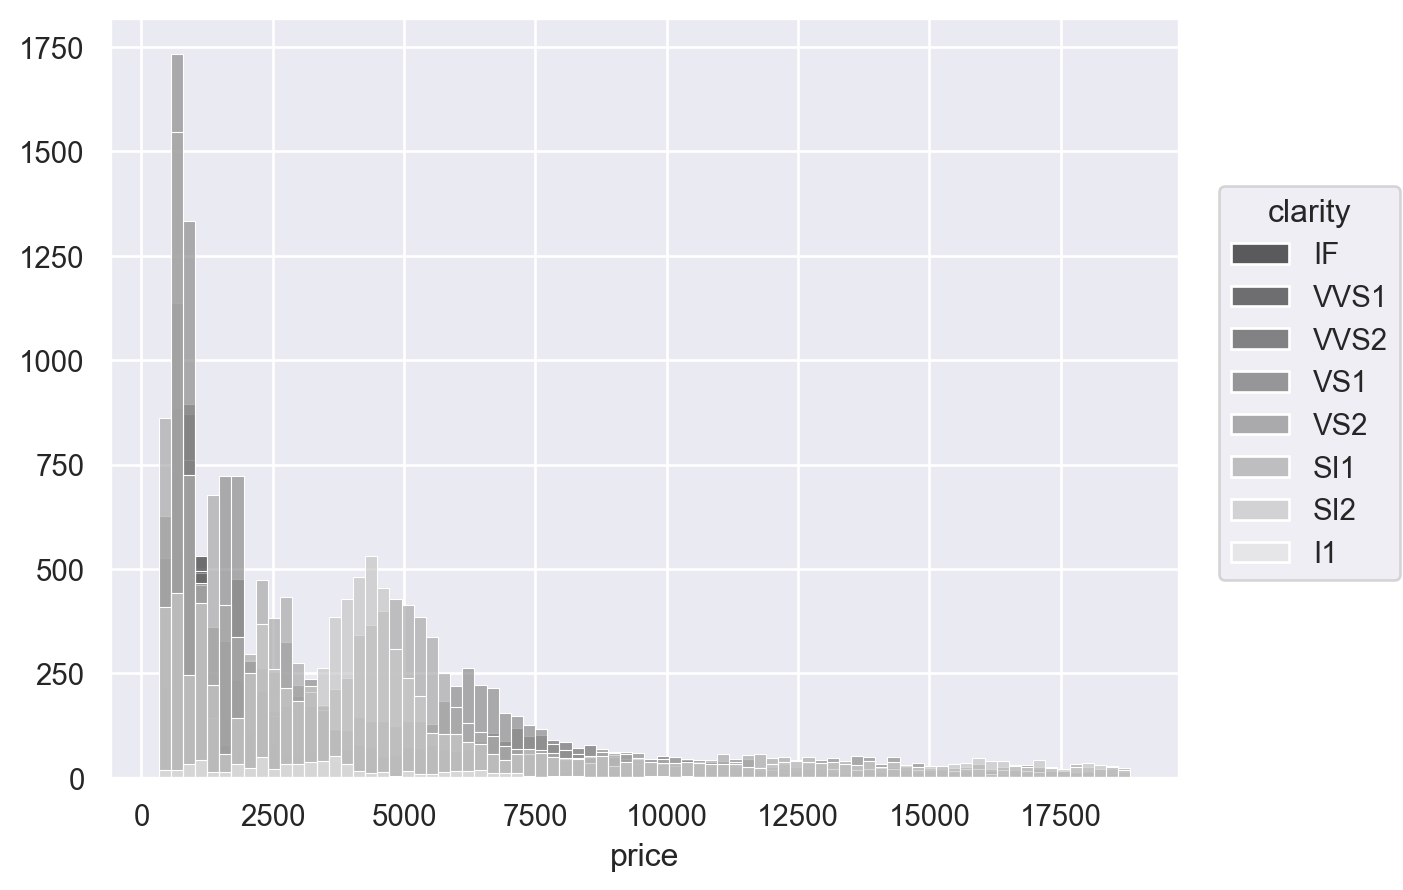

In [93]:
p = so.Plot(diamonds, "price").scale(color = 'gray') 
p.add(so.Bars(), so.Hist(), color="clarity")
# 아래 clarity가 없으면 플롯은 출력되지만 컬러가 안바뀌고,
# 있으면 gray 적용은 되는데 또 위에는 잔뜩 넣어봤는데 다 안돼서 gray말고 적용되는게 뭔지 모르겠다.. 예제 주세요... 👀

**alpha, fillalpha, edgealpha**    
`alpha` 속성은 마크의 불투명도를 결정합니다. 오버플로팅할 경우 알파값을 낮추면 밀도표현에 도움이 될 수 있습니다.    
알파 속성 매핑은 마크가 겹치지 않는 경우에도 중요성을 전달하고 두 가지 변수를 나타내는 색상(color) 스케일과 결합할 수 있기 때문에 유용할 수 있습니다.    
또한 알파가 낮은 색상은 채도가 낮아져 더 큰 채워진 표시(예: 막대)의 모양을 개선할 수 있습니다.    
색상과 마찬가지로 일부 마크는 추가 제어를 위해 별도의 edgealpha 및 fillalpha 속성을 정의합니다.   

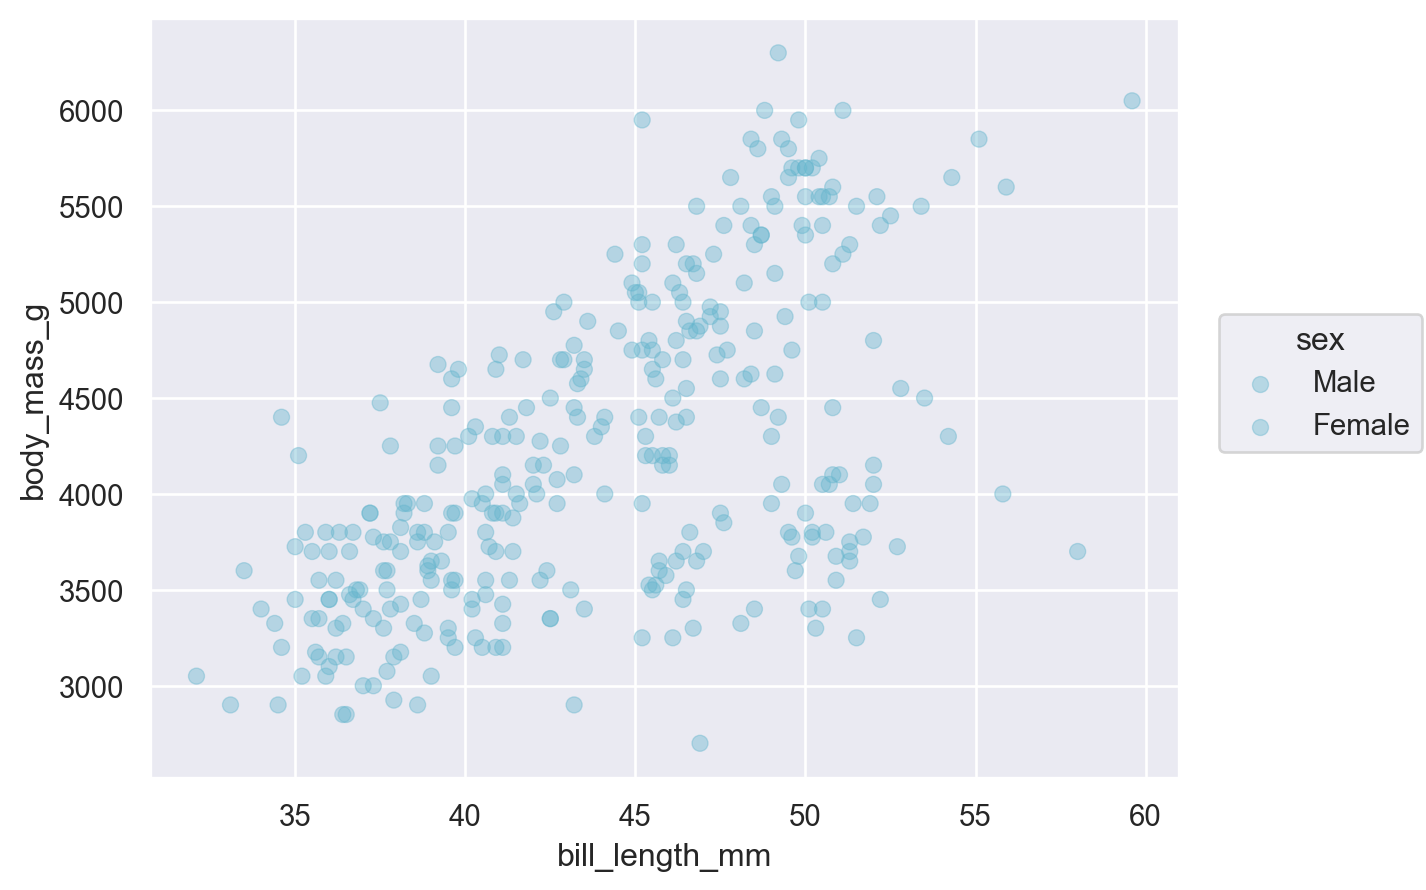

In [105]:
(
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g", color = 'sex')
    .add(so.Dot(color = 'C9', alpha = 0.4))
)

## Style properties
   
**fill**   
`fill` 속성은 가장자리와 내부가 구분되는 마크와 관련이 있으며 내부가 보이는지 여부를 결정합니다.    
부울 상태입니다. 채우기는 True 또는 False로만 설정할 수 있습니다.    
    
**marker**   
`marker` 속성은 점 표시 및 일부 선 표시와 관련이 있습니다.   
마커를 지정하기 위한 API는 matplotlib API 문서 `matplotlib.markers`에 자세히 설명된 것처럼 매우 유연합니다.   
여러 간단한 문자열 코드를 사용하여 마커를 지정할 수 있습니다.   
   
mathtex 문자 코드('$...$') 및 정점 배열을 포함한 추가 형식은 matplotlib 문서를 참조하세요.   

마커 속성은 항상 명명척도로 매핑됩니다. 다른 모양에 고유한 순서가 없습니다.    
배율이 제공되지 않으면 플롯은 적절하게 큰 고유 마커 세트를 프로그래밍 방식으로 생성합니다.   
이렇게 하면 모양이 기술적으로 구별되지만 대부분의 경우 단일 플롯에 한 줌 이상이 사용되는 경우 마커를 구분하기 어렵다는 점에 유의하세요.   

**linestyle, edgestyle**   

`linestyle` 속성은 라인 마크와 관련이 있으며 `edgestyle` 속성은 "가장자리"가 있는 여러 마크와 관련이 있습니다.    
두 속성 모두 온-오프 세그먼트 측면에서 선의 "대시"를 결정합니다.   

대시는 소수의 속기 코드('-', '--', '-.' 및 ':')를 사용하거나 프로그래밍 방식으로 튜플(on, off, ...)을 사용하여 지정할 수 있습니다. 튜플 사양에서 단위는 선폭과 같습니다.   

In [25]:
healthexp = sns.load_dataset("healthexp")
tips = sns.load_dataset("tips")

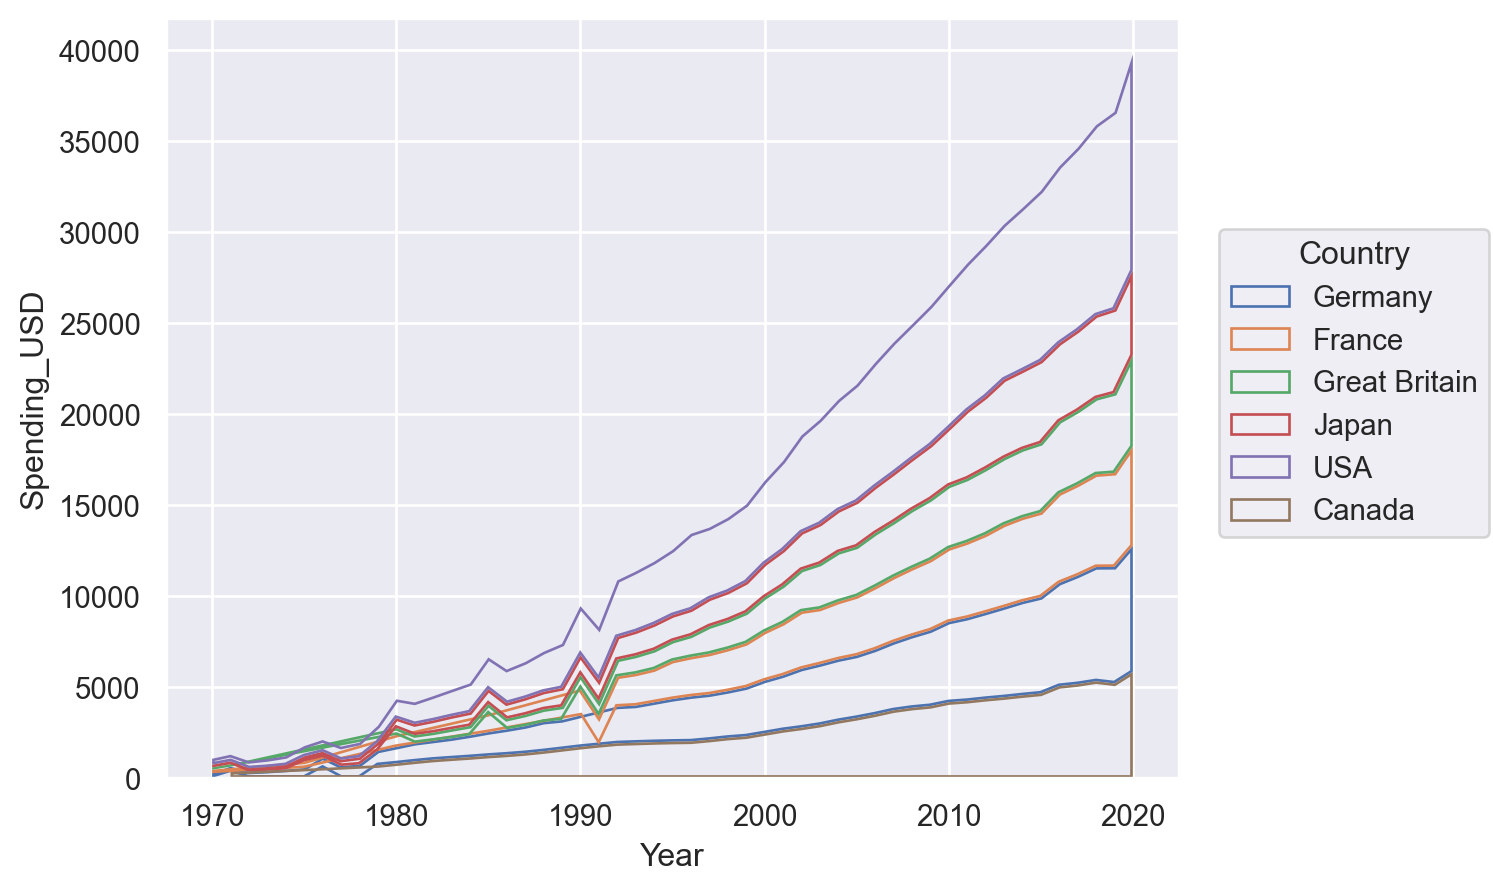

In [31]:
# fill False
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")
p.add(so.Line())
p.add(so.Area(fill = False), so.Stack())

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

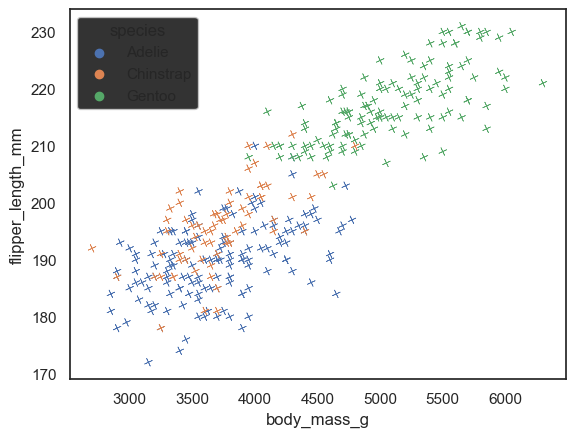

In [48]:
# marker
sns.scatterplot(penguins, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'species', 
                marker = (4,2,25))

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

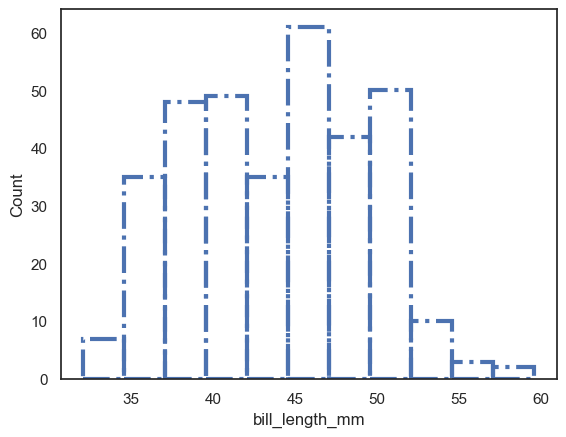

In [62]:
# linestyle
sns.histplot(penguins, x = 'bill_length_mm',fill = False,
            linestyle = '-.', linewidth = 3)

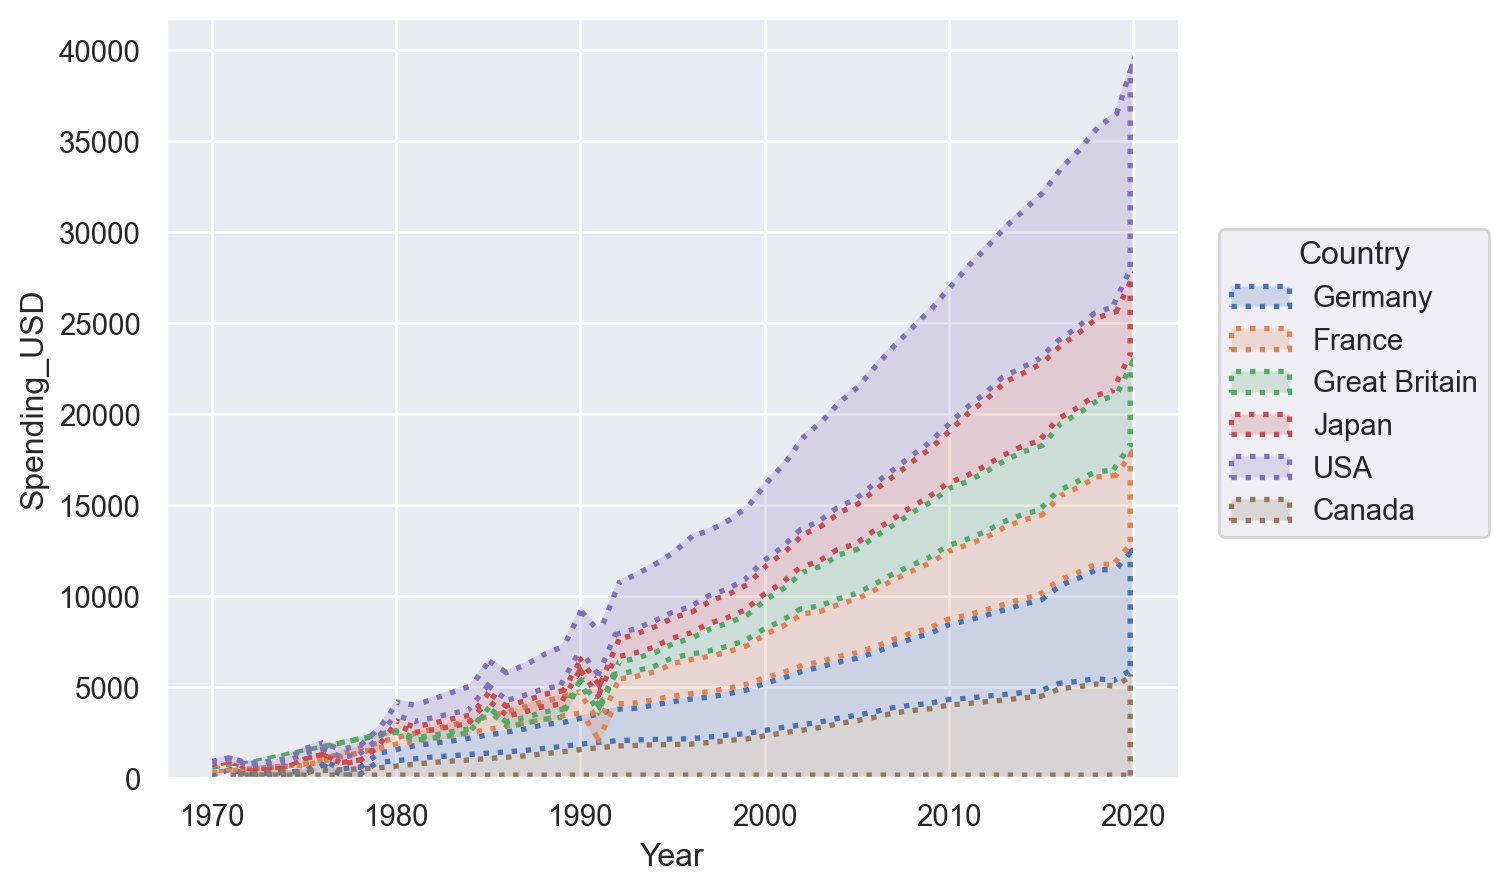

In [72]:
# edgestyle 👀 예시를 Areaplot으로 해봐서 그런가 edgestyle이랑 linestyle 사용 차이가 약간 헷갈림
p.add(so.Area(edgestyle = ':', edgewidth=2), so.Stack())

## Size properties
    
**pointsize**   
`pointsize` 속성은 개별 데이터 포인트에서 마커를 표시할 수 있는 점 표시 및 선 표시와 관련이 있습니다.    
단위는 마크의 직경(포인트)에 해당합니다.    
포인트 크기는 기본적으로 데이터의 제곱근으로 크기가 조정되므로 크기는 면적이 아닌 직경으로 표시됩니다.   
       
**linewidth**    
`linewidth` 속성은 라인 마크와 관련이 있으며 두께를 결정합니다.    
값은 음수가 아니어야 하며 포인트 단위가 있어야 합니다.   
    
**edgewidth**    
`edgewidth` 속성은 linewidth와 유사하지만 선이 아닌 가장자리/채우기가 있는 마크에 적용됩니다.    
또한 척도에서 사용될 때 다른 기본 범위를 갖습니다. 단위는 동일합니다.   

**stroke**   
`stroke` 속성은 edgewidth와 비슷하지만 점 표시가 채우기가 아닌 획으로 정의될 때 적용됩니다.    
또한 기본 축척 범위가 약간 다르지만 그 외에는 유사하게 작동합니다.   

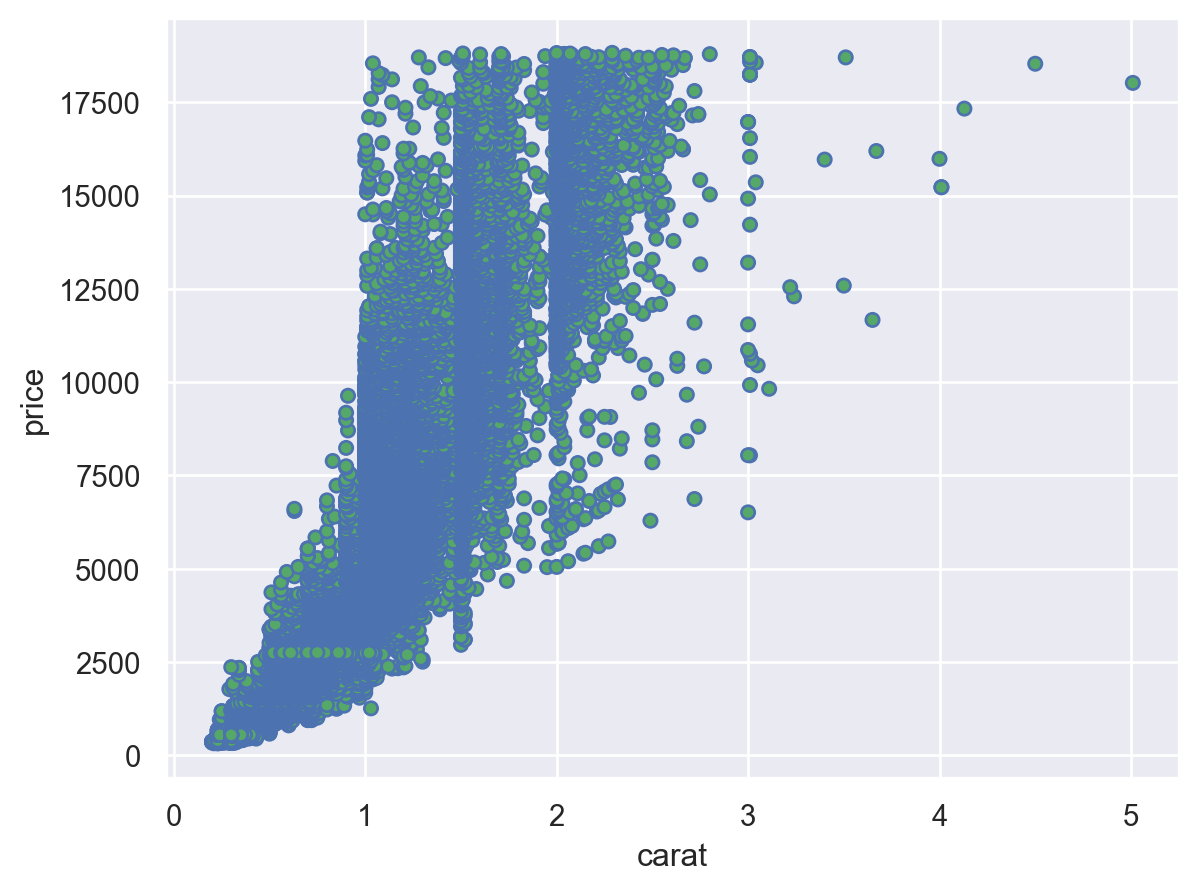

In [92]:
# pointsize, edgewidth, edgecolor(응용)
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dot(color="g", pointsize=5, edgewidth =1 , edgecolor='b'))
)

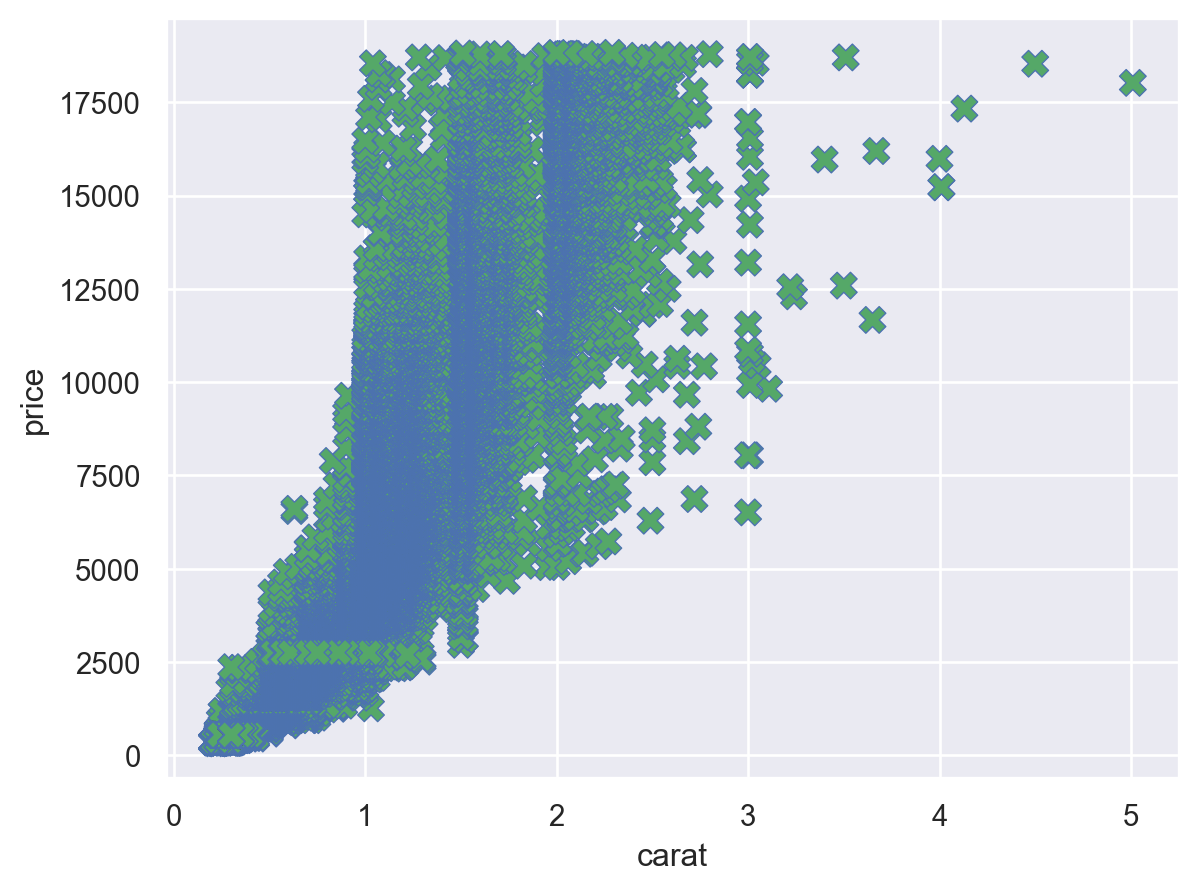

In [98]:
# stroke, stroke도 색은 edgecolor로 설정(strokecolor 아님)
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dot(marker = 'X', color="g", pointsize=10, edgecolor = 'b', stroke = 3))
)

## Text properties
    

**halign, valign**  
`halign` 및 `valign` 속성은 텍스트 마크의 수평 및 수직 정렬을 제어합니다.  
- 수평 정렬 옵션: 'left', 'right', 'center'  
- 수직 정렬 옵션: 'top', 'bottom', 'center', 'baseline', 'center_baseline'  
  
**fontsize**  
`fontsize` 속성은 텍스트 표시의 크기를 제어합니다. 포인트 단위를 숫자 값으로 전달합니다.  
  
**offset**  
`offset` 속성은 텍스트 마크와 앵커 위치 사이의 간격을 제어합니다.   
중앙 정렬을 사용하지 않을 때(즉, 왼쪽/오른쪽 또는 위/아래를 사용할 때) 적용됩니다. 값에는 포인트 단위가 있습니다.

In [115]:
glue = sns.load_dataset("glue")

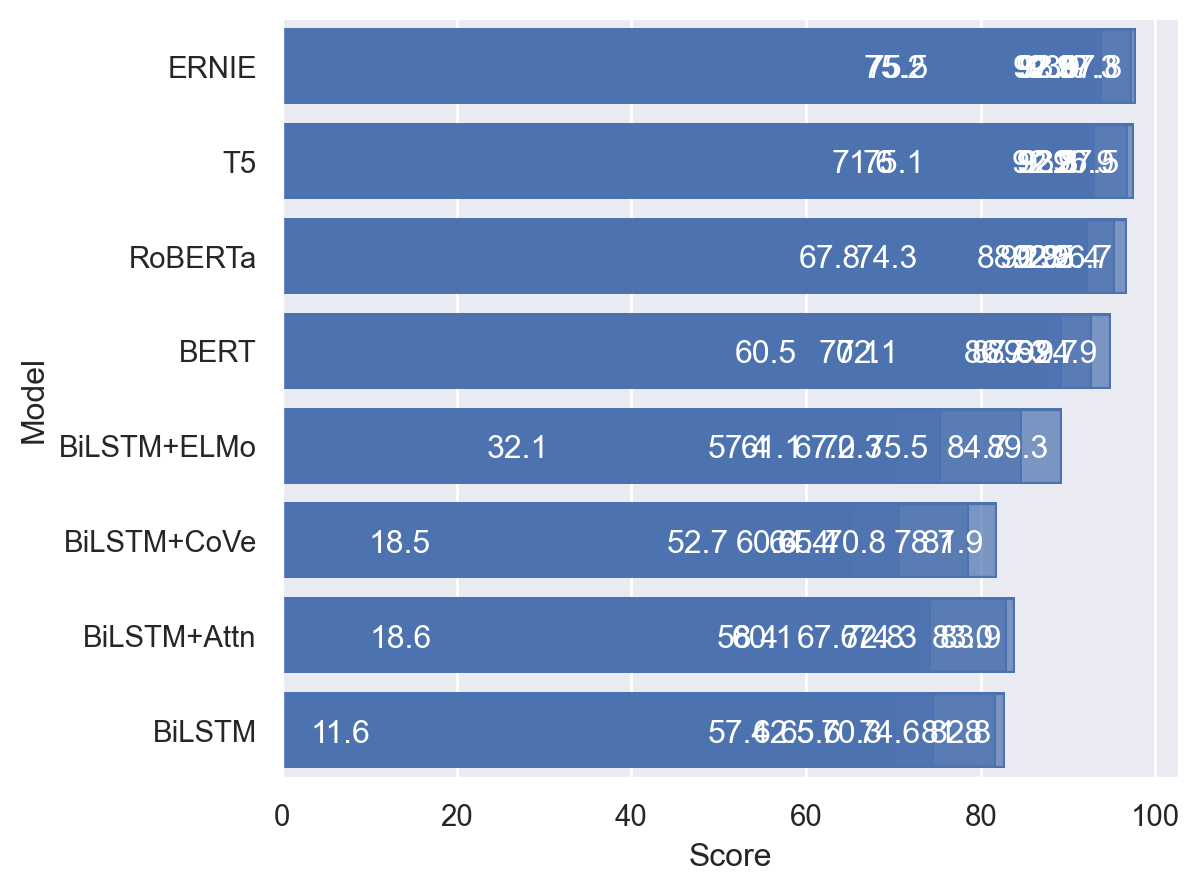

In [145]:
# halign 👀 API > seaborn.object.Text 참고했으나 코드 동작이 안돼서 일부 수정. 
# 작성 위치는 이게 맞는데... 텍스트를 평균값 하나만 나오게 어떻게 해야하나...
(
    so.Plot(glue, x="Score", y="Model", text = 'Score')
    .add(so.Bar(), so.Agg('mean'))
    .add(so.Text(color='w', halign="right", offset = 5))
)

## Other properties
**text**  
`text` 속성은 텍스트 마크의 내용을 설정하는 데 사용됩니다.  
항상 문자 그대로 사용되며(매핑되지 않음) 필요한 경우 문자열로 캐스트됩니다.  
  
**group**  
`group` 속성은 마크의 모양에 대해 아무 것도 변경하지 않지만 변환이 독립적으로 작동해야 하는 추가 데이터 하위집합을 정의한다는 점에서 특별합니다.